# Diversity test

In [2]:
%pylab --n
%matplotlib inline

import seaborn as sns
import pandas as pd
sns.set_palette('colorblind')
import birdsonganalysis as bsa
from os.path import join, exists, basename
from scipy.io import wavfile
import pickle
import json
from pprint import pprint
import warnings
from IPython.display import Audio, display, Markdown

import sys

sys.path.append('../model/')

from song_fitter import SongModel, get_scores
import synth
from synth import synthesize
from measures import bsa_measure

def comp(a, b):
    return np.linalg.norm(a - b)

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
path = '../model/res/seed0+big_ba+on_alpha_silence_beta+prior_amp_entropy+slow_dev+20_replay+10_conc+1_day_conc_170512_191538/'
if exists(join(path, 'aborted.txt')):
    warnings.warn('Aborted run')
if not exists(join(path, 'data.pkl')):
    warnings.warn('Run is not finished')

/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Run is not finished
  """


In [4]:
sr, tutor = wavfile.read(join(path, 'tutor.wav'))
try:
    with open(join(path, 'conf.json'), 'r') as f:
        run_param = json.load(f)
except FileNotFoundError:
    with open(join(path, 'params.json'), 'r') as f:
        run_param = json.load(f)

In [5]:
out = '| key | value |\n|---|---|\n' + '\n'.join(['| {} | {} |'.format(key, run_param[key]) for key in sorted(run_param.keys())])
display(Markdown(out))

| key | value |
|---|---|
| #comment | ['def of sin param : (a * t + b) * sin((t + phase) * f * 2 * pi)', 'Format of each list', '```', '#alpha', 'a, b, phase, f  #sin 1', 'a, b, phase, f  #sin 2', 'a, b, phase, f  #sin 3', 'cst', '#beta', 'a, b, phase, f, cst', '```', 'really ugly way to comment in json, sorry.'] |
| coefs | {'fm': 1, 'pitch': 1, 'goodness': 1, 'entropy': 1, 'am': 1, 'amplitude': 1} |
| commit | 661bd6a1c2c266fc1542ca2b03bdc876d5274721 |
| comp | linalg |
| concurrent | 1 |
| days | 50 |
| dev | [0.1, 0.1, 0.05, 1, 0.05, 0.05, 0.05, 1, 0.001, 0.001, 0.005, 100, 0.2, 0.05, 0.01, 0.05, 1, 0.005] |
| dlm | optimise_gesture_padded |
| iter_per_train | 20 |
| maxs | [50, 4, 3.141592653589793, 40000, 50, 4, 3.141592653589793, 40000, 50, 5, 3.141592653589793, 40000, 10, 50, 3, 3.141592653589793, 1000, 2] |
| mins | [-50, 0, -3.141592653589793, 0, -50, 0, -3.141592653589793, 0, -50, 0, -3.141592653589793, 0, -5, -50, 0, -3.141592653589793, 0, -3] |
| name | seed0+big_ba+on_alpha_silence_beta+prior_amp_entropy+slow_dev+20_replay+10_conc+1_day_conc |
| nb_pad | 3 |
| night_concurrent | 10 |
| nlm | mutate_microbial_diversity_uniform |
| prior | [0, 0, 3.141592653589793, 15, 0, 0, 0.39269908169872414, 45, 0, 0, 0, 5000, 0.0, 0, 0, 0, 0, 0] |
| replay | 20 |
| seed | 1494609338 |
| train_per_day | 2 |
| tutor | ../data/ba_example.wav |

In [6]:
try:
    with open(join(path, 'data.pkl'), 'rb') as f:
        songlog = pickle.load(f)
except FileNotFoundError:
    warnings.warn('warning, learning not over')
    with open(join(path, 'data_cur.pkl'), 'rb') as f:
        songlog = pickle.load(f)

/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: warning, learning not over
  """


In [7]:
night_data = [item[1] for item in songlog if item[0] == 'night']
nd = pd.DataFrame(night_data)

In [8]:
nd

,cond,pop
0,before_evening,[<song_model.SongModel object at 0x7f4a23be3208>]
1,evening,[<song_model.SongModel object at 0x7f4a64c0bc5...
2,before_morning,[<song_model.SongModel object at 0x7f4a23c2874...
3,morning,[<song_model.SongModel object at 0x7f4a23506518>]
4,before_evening,[<song_model.SongModel object at 0x7f4a2351a2e8>]
5,evening,[<song_model.SongModel object at 0x7f4a235201d...
6,before_morning,[<song_model.SongModel object at 0x7f4a234d2e8...
7,morning,[<song_model.SongModel object at 0x7f4a2348cda0>]
8,before_evening,[<song_model.SongModel object at 0x7f4a2349fdd8>]
9,evening,[<song_model.SongModel object at 0x7f4a234a6da...


In [9]:
scores = []
for i, row in nd.iterrows():
    print (i)
    scores.append(get_scores(tutor, nd.iloc[i]['pop'], lambda x: bsa_measure(x, sr, coefs=run_param['coefs']), comp))
nd['scores'] = scores

0
1
2
3
4
5
6
7
8
9
10
11


In [10]:
nd

,cond,pop,scores
0,before_evening,[<song_model.SongModel object at 0x7f4a23be3208>],[244.193518341]
1,evening,[<song_model.SongModel object at 0x7f4a64c0bc5...,"[244.193518341, 244.193518341, 244.193518341, ..."
2,before_morning,[<song_model.SongModel object at 0x7f4a23c2874...,"[244.193518341, 244.193518341, 244.193518341, ..."
3,morning,[<song_model.SongModel object at 0x7f4a23506518>],[244.193518341]
4,before_evening,[<song_model.SongModel object at 0x7f4a2351a2e8>],[323.03732896]
5,evening,[<song_model.SongModel object at 0x7f4a235201d...,"[323.03732896, 323.03732896, 323.03732896, 323..."
6,before_morning,[<song_model.SongModel object at 0x7f4a234d2e8...,"[238.253473805, 244.701422073, 238.253473805, ..."
7,morning,[<song_model.SongModel object at 0x7f4a2348cda0>],[238.253473805]
8,before_evening,[<song_model.SongModel object at 0x7f4a2349fdd8>],[235.172985039]
9,evening,[<song_model.SongModel object at 0x7f4a234a6da...,"[235.172985039, 235.359972498, 237.119781246, ..."


In [11]:
songs_score = []
for i, row in nd.iterrows():
    for song, score in zip(nd.iloc[i]['pop'], nd.iloc[i]['scores']):
        songs_score.append({'i': i, 'score': score, 'cond': nd.iloc[i]['cond']})

scores_df = pd.DataFrame(songs_score)

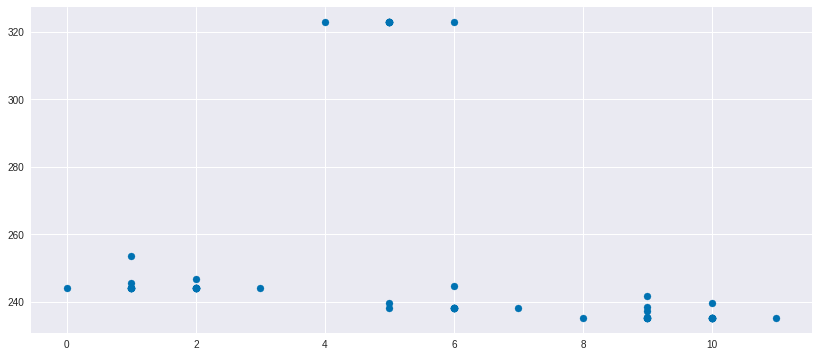

In [12]:
plt.figure(figsize=(14, 6))
plt.scatter(scores_df['i'], scores_df['score'])

In [13]:
songs = nd.iloc[2]['pop']

In [14]:
from bisect import bisect_left

In [15]:
nb_close = 0
for isong, song in enumerate(songs[1:]):
    song_dist = 0
    other = [gesture[0] for gesture in song.gestures]
    for i, gesture in enumerate(songs[0].gestures):
        start = gesture[0]
        near_i = bisect_left(other, start)
        if near_i >= len(other) - 1:
            near_i = len(other) - 2
        cur_dist = np.min((np.abs(start - other[near_i]), np.abs(start - other[near_i+1])))
        song_dist += cur_dist
    if song_dist < 2000:
        nb_close += 1
